In [1]:
import pandas as pd
import os

In [2]:
files=[file for file in os.listdir('C:/Users/Nithish/Desktop/demo/Sales_insight/csv_files')]

In [3]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
all_month=pd.DataFrame()
for file in files:
    df=pd.read_csv('C:/Users/Nithish/Desktop/demo/Sales_insight/csv_files/'+file)
    all_month_data=pd.concat([all_month,df])
all_month_data.to_csv('all_data1.csv',index=False)

In [5]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
##1)what was the best month for sales? how much was earned that month
##befort analysis the data we need to clean the data
all_data.shape

(186850, 6)

In [7]:
all_data.isnull().sum()
df1=all_data.dropna()
df1["month"]=df1["Order Date"].apply(lambda x:x[:2])
df1.shape

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\384751992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["month"]=df1["Order Date"].apply(lambda x:x[:2])


(186305, 7)

In [8]:
df2=df1[df1["month"]!='Or']
df2.shape

(185950, 7)

In [9]:
##data cleaning

In [10]:
df2["month"]=df2["month"].astype("int32")
df2.head()

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\4052364660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["month"]=df2["month"].astype("int32")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
df2['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [13]:
#sales=quantiy*price
df2['Quantity Ordered']=pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each']=pd.to_numeric(df2['Price Each'])

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\1491658760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quantity Ordered']=pd.to_numeric(df2['Quantity Ordered'])
C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\1491658760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price Each']=pd.to_numeric(df2['Price Each'])


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [15]:
df2["sales"]=df2['Quantity Ordered']*df2['Price Each']

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\2347923213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["sales"]=df2['Quantity Ordered']*df2['Price Each']


In [16]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [17]:
##1)what was the best month for sales? how much was earned that month
#solution
res=df2.groupby("month").sum()

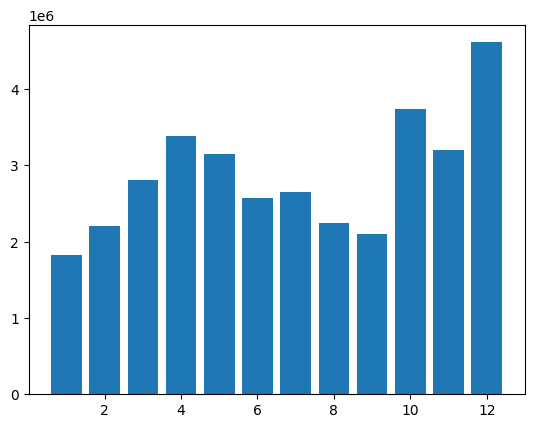

In [18]:
import matplotlib.pyplot as plt
month=range(1,13)
plt.bar(month,res["sales"])
plt.show()

In [19]:
#which city had the the highest nmber of sales
df2.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales'],
      dtype='object')

In [20]:
df2['city']=df2['Purchase Address'].apply(lambda x:x.split(",")[1])
df2.head()

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\1466523887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['city']=df2['Purchase Address'].apply(lambda x:x.split(",")[1])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [21]:
#which city had the the highest nmber of sales
res1=df2.groupby("city").sum()
res1.reset_index(inplace=True)
res1

,city,Quantity Ordered,Price Each,month,sales
0,Atlanta,16602,2779908.20,104794,2795498.58
1,Austin,11153,1809873.61,69829,1819581.75
2,Boston,22528,3637409.77,141112,3661642.01
3,Dallas,16730,2752627.82,104620,2767975.40
4,Los Angeles,33289,5421435.23,208325,5452570.80
5,New York City,27932,4635370.83,175741,4664317.43
6,Portland,14053,2307747.47,87765,2320490.61
7,San Francisco,50239,8211461.74,315520,8262203.91
8,Seattle,16553,2733296.01,104941,2747755.48


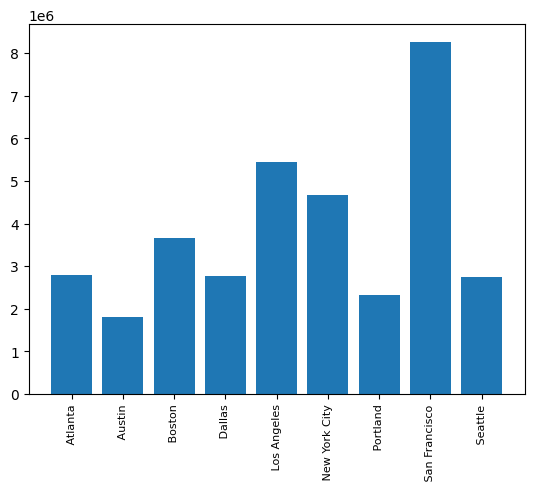

In [22]:
#plot
plt.bar(res1["city"],res1["sales"])
plt.xticks(res1["city"],rotation="vertical",size=8)
plt.show()

In [23]:
#what time should we adverst to maximize likellood of customer buying product
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [24]:
df2['time']=pd.to_datetime(df2['Order Date'])

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\1749164013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time']=pd.to_datetime(df2['Order Date'])


In [25]:
df2["hour"]=df2["time"].dt.hour
df2["min"]=df2["time"].dt.minute

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\4065105650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["hour"]=df2["time"].dt.hour
C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\4065105650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["min"]=df2["time"].dt.minute


In [26]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time,hour,min
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


In [27]:
#what time should we adverst to maximize likellood of customer buying product
res3=df2.groupby("hour").count()
res3.reset_index(inplace=True)
res3

,hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time,min
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748


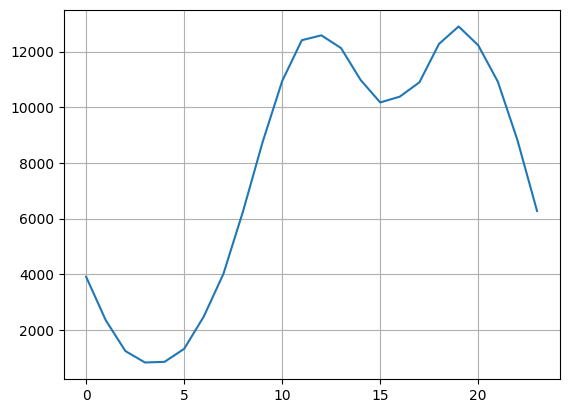

In [28]:
plt.plot(res3["hour"],res3["time"])
plt.grid()
plt.show()


In [29]:
#what product are most often sold together
df2.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city', 'time', 'hour', 'min'],
      dtype='object')

In [30]:
df2['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [31]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time,hour,min
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


In [43]:
df4=df2[df2["Order ID"].duplicated(keep=False)]
df4["grouped"]=df4.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
df4=df4[["grouped","Order ID"]].drop_duplicates()
df4.head(20)

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\3687811026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["grouped"]=df4.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


,grouped,Order ID
3,"Google Phone,Wired Headphones",176560
18,"Google Phone,USB-C Charging Cable",176574
30,"Bose SoundSport Headphones,Bose SoundSport Hea...",176585
32,"AAA Batteries (4-pack),Google Phone",176586
119,"Lightning Charging Cable,USB-C Charging Cable",176672
129,"Apple Airpods Headphones,ThinkPad Laptop",176681
138,"Bose SoundSport Headphones,AAA Batteries (4-pack)",176689
189,"34in Ultrawide Monitor,Google Phone",176739
225,"Lightning Charging Cable,USB-C Charging Cable",176774
233,"iPhone,Lightning Charging Cable",176781


In [ ]:
from itertools import combinations
from collections import counter
count=counter()
for i in df4["grouped"]:
    row=i.split(",")
    count.update(counter(combinations(row,2)))
count.most_common(10)

In [ ]:
#product are sold often

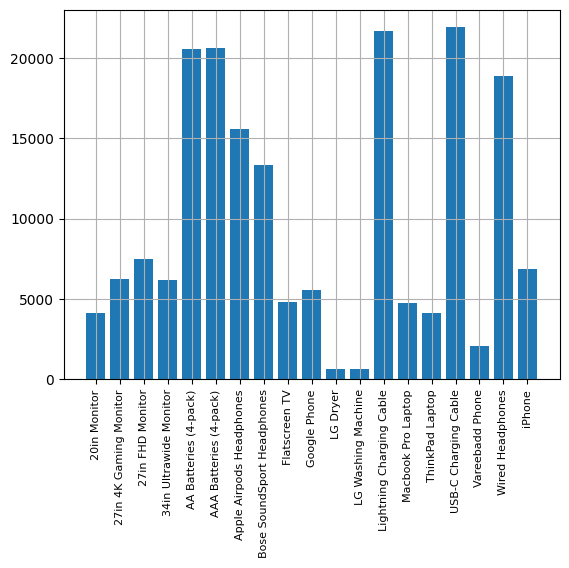

In [34]:
res4=df2.groupby("Product").count()
res4.reset_index(inplace=True)
plt.bar(res4["Product"],res4["sales"])
plt.xticks(res4["Product"],rotation="vertical",size=8)
plt.grid()
plt.show()

C:\Users\Nithish\AppData\Local\Temp\ipykernel_10148\3687468758.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(res4["Product"],rotation="vertical",size=8)


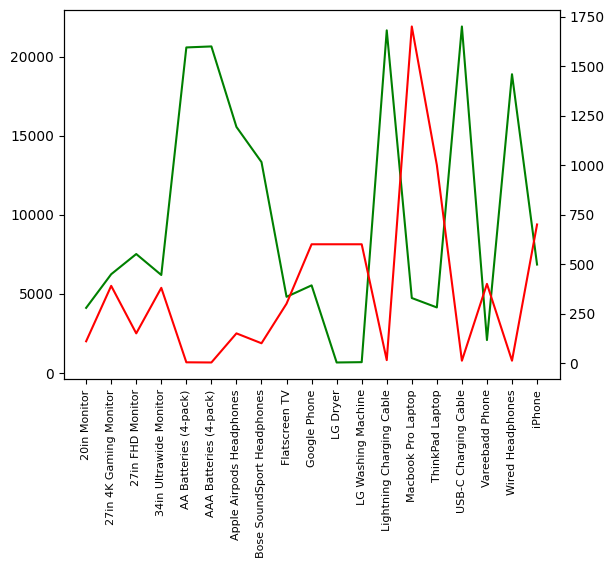

In [35]:
prices=df2.groupby("Product").mean()["Price Each"]
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(res4["Product"],res4["sales"],"g-")
ax2.plot(res4["Product"],prices,"r-")
ax1.set_xticklabels(res4["Product"],rotation="vertical",size=8)
plt.show()